** like the first one** 

---



---



In [ ]:
!pip install segmentation-models
!pip install tensorflow==2.1.0
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421.8 MB 20 kB/s 
     |████████████████████████████████| 448 kB 43.3 MB/s 
     |████████████████████████████████| 3.8 MB 39.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=9960ddba04f161fc44bcd00a1888996978b141f3ca191653fe93243171ceafc6
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 26.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 18.1 MB/s 
     |████████████████████████████████| 15.7 MB 14.2 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which i

In [ ]:
%matplotlib inline


In [ ]:
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf
import segmentation_models as sm
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

Segmentation Models: using `keras` framework.


In [ ]:
#Resizing images is optional, CNNs are ok with large images
SIZE_X = 128 #previously 256
SIZE_Y = 128

In [ ]:

#print(os.listdir("images/"))
#SIZE = 512 #Resize images

train_images = []

for directory_path in glob.glob("/content/drive/MyDrive/simages"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        #img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
        
train_images = np.array(train_images)


In [ ]:
train_masks = [] 
for directory_path in glob.glob("/content/drive/MyDrive/slabels"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        #mask = cv2.resize(mask, (SIZE, SIZE))
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
        
train_masks = np.array(train_masks)


<function matplotlib.pyplot.show>

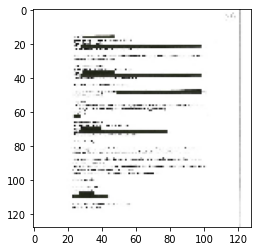

In [ ]:
# print out images of each array to make sure they match
plt.imshow(train_images[10])
plt.show

<function matplotlib.pyplot.show>

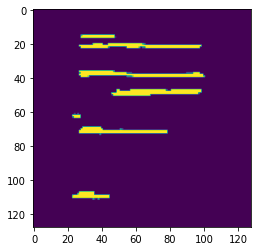

In [ ]:
plt.imshow(train_masks[10])
plt.show

In [ ]:
#Use customary x_train and y_train variables
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis=3) #May not be necessary

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [ ]:
# define model
# Use iou (much better than mse/accuracy for segmentation)
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score],)

#print(model.summary())

In [ ]:
################# Fitting and evaluating the model ############################

In [ ]:
# fit model
model.fit(
   x=x_train,
   y=y_train,
   batch_size=32,
   epochs=200,
   verbose=1,
   validation_data=(x_val, y_val),
)

#accuracy = model.evaluate(x_val, y_val)

Train on 80 samples, validate on 20 samples
Epoch 1/200
80/80 [==============================] - 54s 670ms/step - loss: 9.1437 - iou_score: 0.7908 - val_loss: 11.4843 - val_iou_score: 0.3686
Epoch 2/200
80/80 [==============================] - 36s 452ms/step - loss: -17.9124 - iou_score: 2.1624 - val_loss: 33.1218 - val_iou_score: 0.2897
Epoch 3/200
80/80 [==============================] - 37s 458ms/step - loss: -46.9663 - iou_score: 4.8127 - val_loss: -8.3624 - val_iou_score: 1.0187
Epoch 4/200
80/80 [==============================] - 37s 461ms/step - loss: -60.6571 - iou_score: 7.0884 - val_loss: -170.9052 - val_iou_score: 4.0985
Epoch 5/200
80/80 [==============================] - 37s 467ms/step - loss: -77.8270 - iou_score: 7.8956 - val_loss: -309.4634 - val_iou_score: 5.4040
Epoch 6/200
80/80 [==============================] - 37s 459ms/step - loss: -96.5134 - iou_score: 10.1672 - val_loss: -537.5604 - val_iou_score: 7.5262
Epoch 7/200
80/80 [==============================] - 36s 

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/unetlt.h5')


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/unetlt.h5', compile=False)

In [ ]:
################################################################# First test ##############################################################################

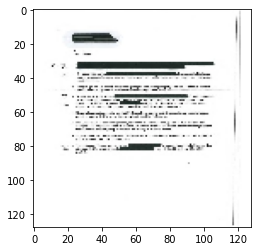

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('21.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

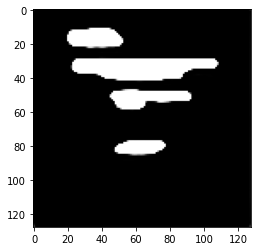

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf21-unetlt.png', prediction_image, cmap='gray')

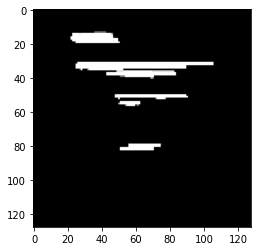

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/21.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# second test ##############################################################################

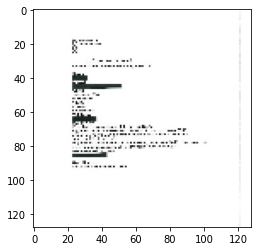

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('10.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

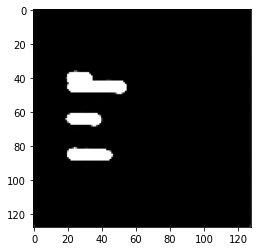

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf10-unetlt.png', prediction_image, cmap='gray')

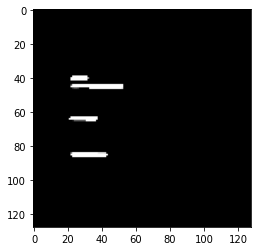

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/10.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# Third test ##############################################################################

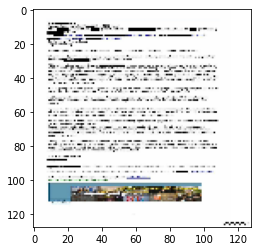

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('36.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

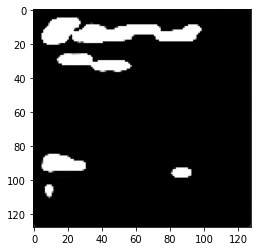

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf36-unetlt.png', prediction_image, cmap='gray')

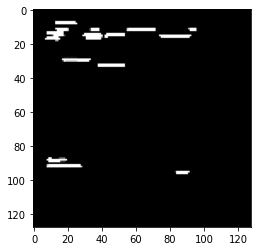

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/36.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# Forth test ##############################################################################

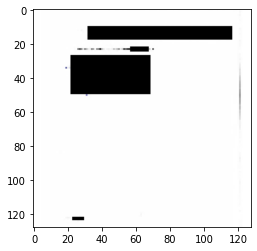

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('29.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

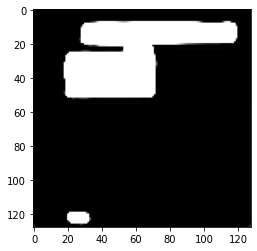

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf29-unetlt.png', prediction_image, cmap='gray')

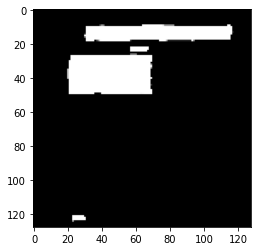

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/29.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# Fifth test ##############################################################################

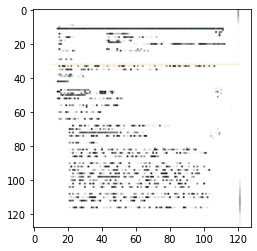

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('52.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

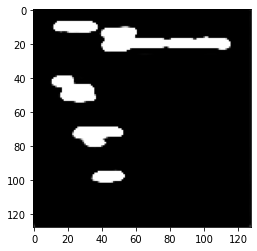

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf52-unetlt.png', prediction_image, cmap='gray')

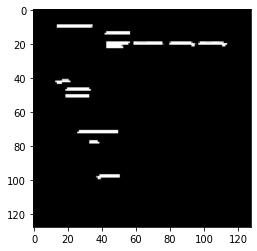

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/52.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# sixth test ##############################################################################

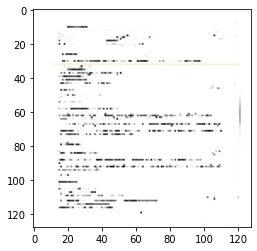

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('56.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

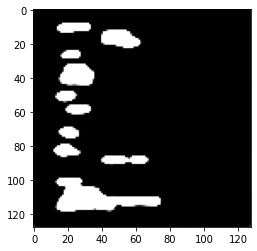

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf56-unetlt.png', prediction_image, cmap='gray')

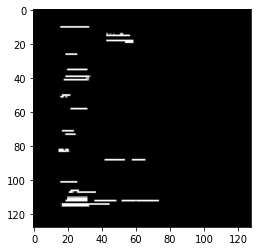

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/56.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# seventh test ##############################################################################

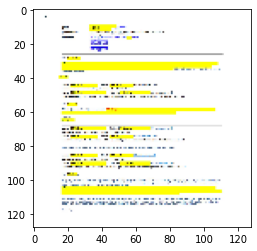

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('45.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

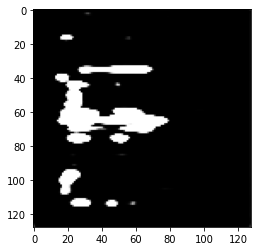

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf45-unetlt.png', prediction_image, cmap='gray')

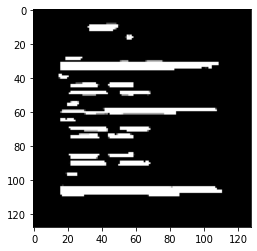

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/45.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# 8th test ##############################################################################

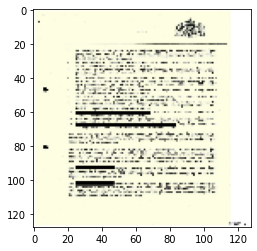

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('82.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

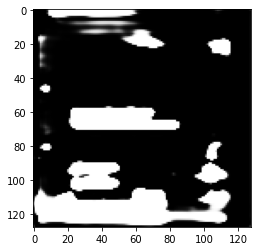

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf82-unetlt.png', prediction_image, cmap='gray')

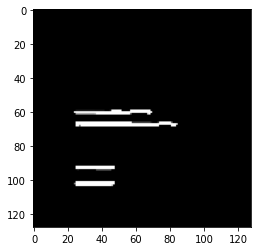

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/82.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# 9th test ##############################################################################

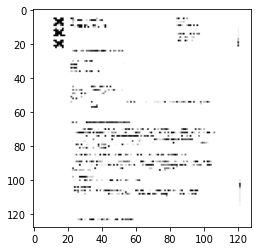

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('80.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

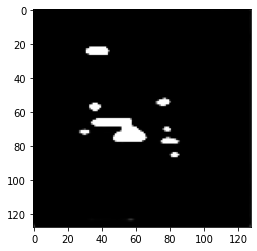

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf80-unetlt.png', prediction_image, cmap='gray')

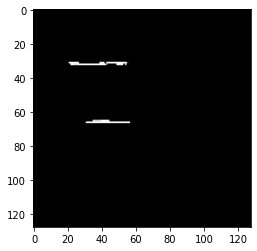

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/80.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# 11th test ##############################################################################

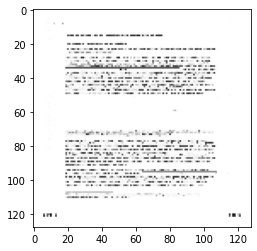

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('76.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

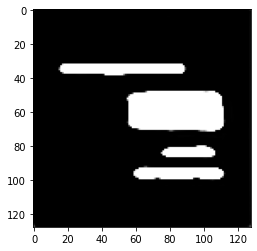

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf76-unetlt.png', prediction_image, cmap='gray')

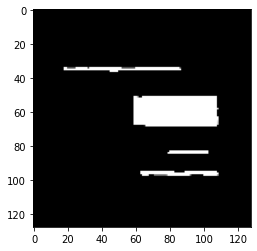

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/76.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
################################################################# 12th test ##############################################################################

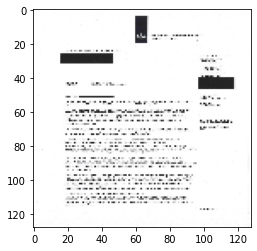

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('77.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

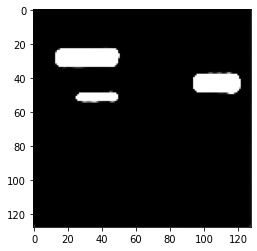

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
plt.imsave('/content/drive/MyDrive/segmented/predOf77-unetlt.png', prediction_image, cmap='gray')

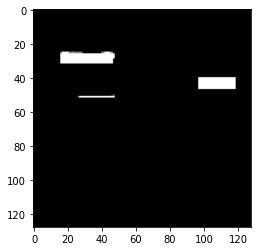

In [ ]:
#view ground truth
test_img = cv2.imread('/content/drive/MyDrive/slabels/77.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)